In [1]:
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing data
import pandas as pd
df=pd.read_csv('pima-indians-diabetes-1.csv')

In [5]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [14]:
for col in list(df.columns):
    print(df[col].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Preg, dtype: int64
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Plas, Length: 136, dtype: int64
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: Pres, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37

In [17]:
import matplotlib as plt

<AxesSubplot:>

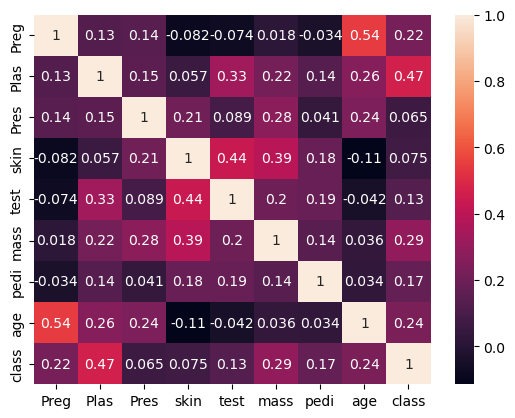

In [23]:
sns.heatmap(df.corr(), annot=True)

In [24]:
from sklearn.model_selection import train_test_split

In [28]:
x=df.drop('class',axis=1)
y=df['class']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101 )

In [31]:
from sklearn.naive_bayes import BernoulliNB
nbmodel = BernoulliNB().fit(x_train, y_train)

In [32]:
test_predict=nbmodel.predict(x_test)
train_predict=nbmodel.predict(x_train)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [36]:
print("test result", classification_report(y_test, test_predict))
print("train result", classification_report(y_train, train_predict))

test result               precision    recall  f1-score   support

           0       0.67      1.00      0.80       103
           1       0.00      0.00      0.00        51

    accuracy                           0.67       154
   macro avg       0.33      0.50      0.40       154
weighted avg       0.45      0.67      0.54       154

train result               precision    recall  f1-score   support

           0       0.65      1.00      0.79       397
           1       0.00      0.00      0.00       217

    accuracy                           0.65       614
   macro avg       0.32      0.50      0.39       614
weighted avg       0.42      0.65      0.51       614



In [37]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB().fit(x_train, y_train)

In [38]:
mtest_predict=nbmodel.predict(x_test)
mtrain_predict=nbmodel.predict(x_train)

In [39]:
print("test result", classification_report(y_test, mtest_predict))
print("train result", classification_report(y_train, mtrain_predict))

test result               precision    recall  f1-score   support

           0       0.72      0.72      0.72       103
           1       0.43      0.43      0.43        51

    accuracy                           0.62       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.62      0.62      0.62       154

train result               precision    recall  f1-score   support

           0       0.68      0.68      0.68       397
           1       0.42      0.43      0.42       217

    accuracy                           0.59       614
   macro avg       0.55      0.55      0.55       614
weighted avg       0.59      0.59      0.59       614

